<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Aula02_Bioestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão da aula 1

**Comentários da tarefa 1**

# Cenário do Experimento: Efeito de um Novo Fertilizante em Plantas de Soja

Um **biólogo** queria testar o efeito de um novo fertilizante no crescimento de plantas de soja. Ele dividiu 30 plantas em três grupos: um grupo controle (sem fertilizante), um grupo com fertilizante padrão e um grupo com o novo fertilizante. Após 45 dias, ele mediu várias características das plantas.

# Dados para estudar na aula

* id: ID da Planta
* tratamento: Grupo de Tratamento
* tipo_solo: Tipo de Solo
* ph: pH do Solo
* altura: Altura (cm)
* peso_folhagem: Peso da Folhagem (g)
* numero_vagens: Número de Vagens
* qualidade_folhagem: Qualidade da Folhagem



# Classificação das Variáveis

Classifique cada uma das variáveis do banco de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [ ]:
dados = pd.read_csv("soja.csv", encoding= "latin-1")

In [ ]:
dados.head()

,id,tratamento,tipo_solo,ph,altura,peso,numero_vagens,qualidade_folhagem
0,1,Controle,Argiloso,6.5,45.2,55.8,12,Baixa
1,2,Padrão,Arenoso,6.8,58.9,72.1,18,Média
2,3,Novo Fertilizante,Húmus,7.1,75.4,95.5,25,Alta
3,4,Controle,Argiloso,6.4,48.1,60.3,14,Baixa
4,5,Padrão,Arenoso,6.7,62.5,78.2,20,Média


# Remover coluna "id" desnecessária para analisar os dados

In [ ]:
dados = dados.drop('id', axis=1)
dados.head()

,tratamento,tipo_solo,ph,altura,peso,numero_vagens,qualidade_folhagem
0,Controle,Argiloso,6.5,45.2,55.8,12,Baixa
1,Padrão,Arenoso,6.8,58.9,72.1,18,Média
2,Novo Fertilizante,Húmus,7.1,75.4,95.5,25,Alta
3,Controle,Argiloso,6.4,48.1,60.3,14,Baixa
4,Padrão,Arenoso,6.7,62.5,78.2,20,Média


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tratamento          30 non-null     object 
 1   tipo_solo           30 non-null     object 
 2   ph                  30 non-null     float64
 3   altura              30 non-null     float64
 4   peso                30 non-null     float64
 5   numero_vagens       30 non-null     int64  
 6   qualidade_folhagem  30 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ KB


In [ ]:
dados.describe()

,ph,altura,peso,numero_vagens
count,30.000000,30.000000,30.000000,30.000000
mean,6.800000,61.510000,77.270000,19.500000
std,0.261297,12.856351,17.292457,6.072834
min,6.400000,42.900000,51.700000,10.000000
25%,6.600000,48.275000,60.450000,14.000000
50%,6.800000,61.750000,77.450000,19.500000
75%,7.000000,73.775000,92.450000,24.000000
max,7.200000,80.500000,105.300000,30.000000


# Construir tabela de frequências



*   Faça uma tabela de frequências para **Tipo de solo**. Interprete os resultados da tabela.
*   Faça uma tabela de contingência para **Tratamento**	e **Tipo de solo**. Interprete os resultados da tabela.



In [ ]:
frequencia_tipo_solo = dados['tipo_solo'].value_counts()
display(frequencia_tipo_solo)

,count
tipo_solo,
Argiloso,10
Arenoso,10
Húmus,10


In [ ]:
tabela_contingencia_tratamento_solo = pd.crosstab(dados['tratamento'], dados['tipo_solo'])
display(tabela_contingencia_tratamento_solo)

tipo_solo,Arenoso,Argiloso,Húmus
tratamento,,,
Controle,0,10,0
Novo Fertilizante,0,0,10
Padrão,10,0,0


# Gráfico de barras


* Faça um gráfico de barras para Tipo de solo. Interprete os
resultados do gráfico.
* Faça um gráfico de barras conjunto para Tratamento e Tipo de solo. Interprete os resultados do gráfico.

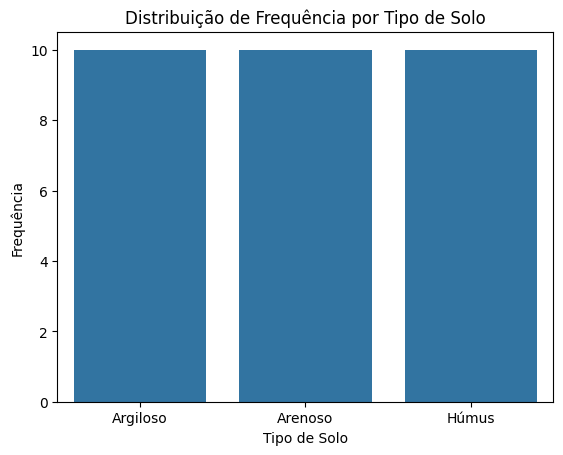

In [ ]:
# Gráfico de barras para Tipo de solo
sns.countplot(data=dados, x='tipo_solo')
plt.xlabel('Tipo de Solo')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência por Tipo de Solo')
plt.xticks(rotation=0)
plt.show()

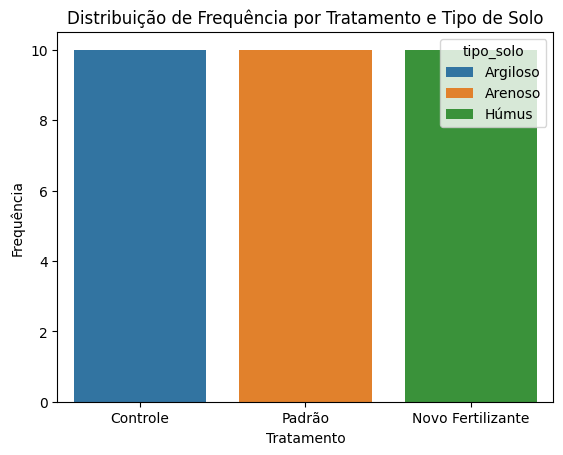

In [ ]:
# Gráfico de barras conjunto para Tratamento e Tipo de solo
sns.countplot(data=dados, x='tratamento', hue='tipo_solo')
plt.xlabel('Tratamento')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência por Tratamento e Tipo de Solo')
plt.xticks(rotation=0)
plt.show()

# Gráfico de pizza

* Faça um gráfico de barras para Tipo de solo. Interprete os
resultados do gráfico.

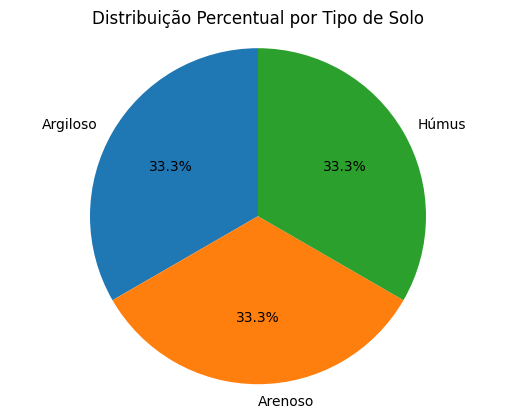

In [ ]:
# Gráfico de pizza para Tipo de solo
frequencia_tipo_solo.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('') # Remove o label 'tipo_solo' do eixo y
plt.title('Distribuição Percentual por Tipo de Solo')
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo
plt.show()

# Histograma

Faça um histograma para  a variável ph do solo

In [ ]:
ph_intervals = pd.cut(dados['ph'], bins=6)
ph_intervals

,ph
0,"(6.399, 6.533]"
1,"(6.667, 6.8]"
2,"(7.067, 7.2]"
3,"(6.399, 6.533]"
4,"(6.667, 6.8]"
5,"(7.067, 7.2]"
6,"(6.533, 6.667]"
7,"(6.8, 6.933]"
8,"(6.933, 7.067]"
9,"(6.399, 6.533]"


In [ ]:
frequencia_ph_intervalos = ph_intervals.value_counts().sort_index()
display(frequencia_ph_intervalos)

,count
ph,
"(6.399, 6.533]",7
"(6.533, 6.667]",3
"(6.667, 6.8]",7
"(6.8, 6.933]",3
"(6.933, 7.067]",3
"(7.067, 7.2]",7


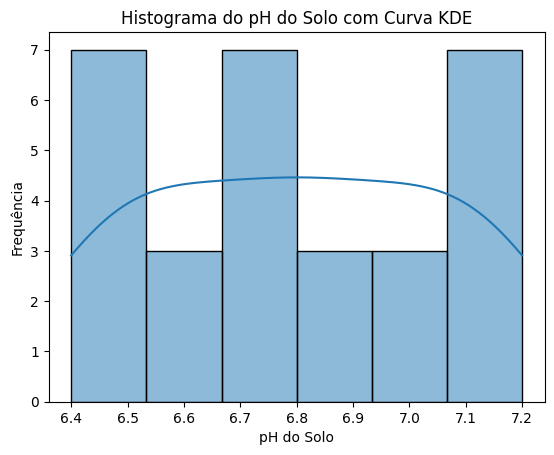

In [ ]:
sns.histplot(data=dados, x='ph', bins=6, kde=True, edgecolor='black')
plt.xlabel('pH do Solo')
plt.ylabel('Frequência')
plt.title('Histograma do pH do Solo com Curva KDE')
plt.show()

In [ ]:
1 + 3.3*mt.log(30, 10)

5.874500140574885

# Gráfico de dispersão

Faça gráfico de dispersão entre Altura e Peso m função de solo

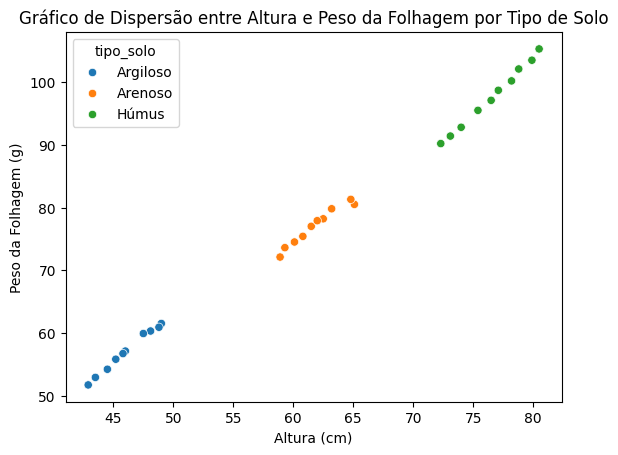

In [ ]:
sns.scatterplot(data=dados, x='altura', y='peso', hue='tipo_solo')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso da Folhagem (g)')
plt.title('Gráfico de Dispersão entre Altura e Peso da Folhagem por Tipo de Solo')
plt.show()

# Medidas de tendência central

Determine a média, mediana e moda da variável **pH do Solo**

In [ ]:
# Média
media_ph = dados['ph'].mean()
print(f"A média do pH do solo é: {media_ph:.2f}")

A média do pH do solo é: 6.80


In [ ]:
# Mediana
mediana_ph = dados['ph'].median()
print(f"A mediana do pH do solo é: {mediana_ph:.2f}")

A mediana do pH do solo é: 6.80


In [ ]:
# Moda
moda_ph = dados['ph'].mode()
print(f"A moda do pH do solo é: {moda_ph}")

A moda do pH do solo é: 0    6.5
1    6.8
2    7.1
Name: ph, dtype: float64


## Simetria e assimetria

* Simetria
* Assimetria à direita
* Assimetria à esquerda


In [ ]:
pokemon = pd.DataFrame([3, 5, 2, 6, 7, 50])
pokemon.mean()

,0
0,12.166667


In [ ]:
pokemon.median()

,0
0,5.5
